In [295]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [296]:
data = pd.read_csv('master.csv')
#einlesen der Datei

In [297]:
display(data)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [298]:
print(data.columns)
#Spaltenname 

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [300]:
data.shape
#Zeilen- und Spaltenzahl

(31756, 12)

In [301]:
print(data.isnull().sum())
#Anzahl der fehlenden oder Null Werte

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


<Axes: >

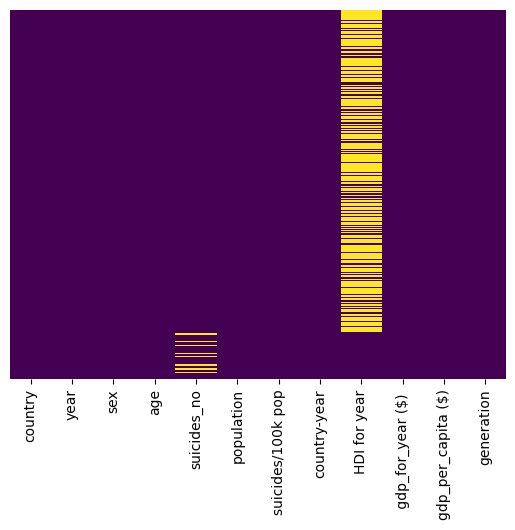

In [302]:
sns.heatmap(data.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')
#fehlende Werte als graphische Darstellung

In [303]:
dataclean = data.drop(columns = ['gdp_per_capita ($)'])
dataclean = dataclean.drop(columns = ['HDI for year'])
dataclean = dataclean.drop(columns = ['country-year'])
# HDI,GDP von der Hauptstadt, und Variable mit Land+Jahr raus

In [304]:
dataclean = dataclean.rename(columns= {' gdp_for_year ($) ': 'gdp_for_year ($)'})
#Zeile vom järhlichen GDP umbennenn

In [305]:
dataclean['country'].replace('United States', 'United States of America', inplace=True)
# alle Werte der USA werden bis 2015 als United States betitelt und danach als United States of America
# deswegen alle Werte der USA gleich betiteln mit 'United States of America'

In [306]:
dataclean = dataclean.dropna()
#null-Werte löschen
dataclean['gdp_for_year ($)'] = dataclean['gdp_for_year ($)'].str.replace(',', '')
#unnötige und falsch gesetze Kommas beim GDP entfernen 

In [307]:
dataclean['gdp_for_year ($)'] = dataclean['gdp_for_year ($)'].astype(float)
#gdp Daten umgewandelt 

In [308]:
display(dataclean)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,2.156625e+09,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,2.156625e+09,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,2.156625e+09,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,2.156625e+09,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,2.156625e+09,Boomers
...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,1.120000e+11,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,2.700000e+12,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,1.950000e+13,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,6.423397e+10,G.I. Generation


In [309]:
print(dataclean.columns)
#Name der spalten

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'generation'],
      dtype='object')


In [310]:
dataclean.shape 
#zeilen,spalten

(30556, 9)

In [311]:
print(dataclean.isnull().sum())
# Null-Werte des bereinigten Datensatz (Kontrolle)

country              0
year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year ($)     0
generation           0
dtype: int64


<Axes: >

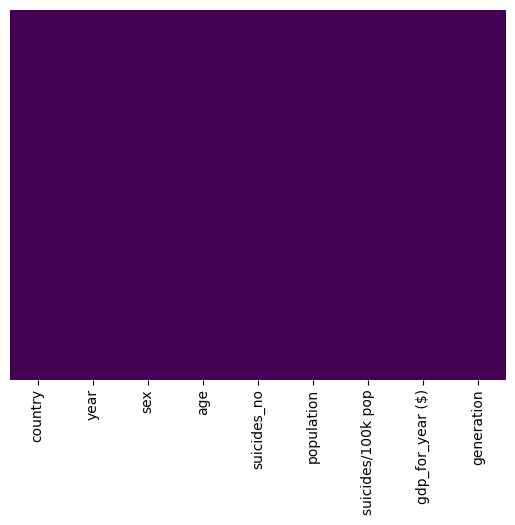

In [312]:
sns.heatmap(dataclean.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')
#fehlende Nullwerte graphsich (Kontrolle)

In [313]:
dataclean.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($)
count,30556.000000,30556.000000,3.055600e+04,30556.000000,3.055600e+04
mean,2002.766854,237.136242,4.990492e+06,12.176806,5.437237e+11
std,9.408922,867.956107,3.352492e+07,21.883165,2.353760e+12
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07
25%,1995.000000,3.000000,1.198480e+05,0.553214,1.017287e+10
50%,2003.000000,25.000000,5.148010e+05,4.790000,5.385106e+10
75%,2010.000000,132.000000,2.401046e+06,15.150000,2.760000e+11
max,2020.000000,22338.000000,1.396215e+09,515.092734,5.100000e+13


In [314]:
datanummeric = dataclean.select_dtypes(include=['number'])
corr = datanummeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($)
year,1.000000,-0.013955,0.152605,-0.075636,0.116055
suicides_no,-0.013955,1.000000,0.099528,0.270322,0.290381
population,0.152605,0.099528,1.000000,-0.050510,0.281185
suicides/100k pop,-0.075636,0.270322,-0.050510,1.000000,0.299586
gdp_for_year ($),0.116055,0.290381,0.281185,0.299586,1.000000


,country,suicides_no
0,Albania,1970.0
1,Antigua and Barbuda,11.0
2,Argentina,91931.0
3,Armenia,2057.0
4,Aruba,101.0
...,...,...
108,United Arab Emirates,622.0
109,United Kingdom,152238.0
110,United States of America,1095226.0
111,Uruguay,15258.0


Text(0, 0.5, 'Anzahl')

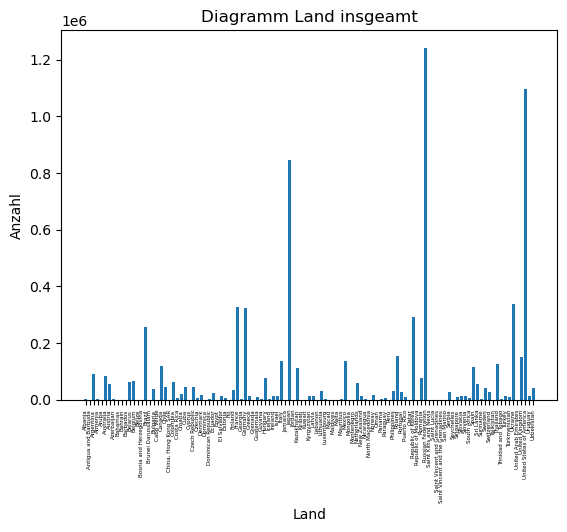

In [367]:
country_no = dataclean.groupby('country')['suicides_no'].sum().reset_index()
display(country_no)
plt.bar(country_no['country'], country_no['suicides_no'])
plt.title('Diagramm Land insgeamt')
plt.xticks(rotation='vertical', fontsize = 4)
plt.xlabel('Land')
plt.ylabel('Anzahl')
#Anzahl der Suizide Gesamt pro Land von 1985 bis 2021 summiert

In [316]:
population_no = dataclean.groupby('country')['population'].sum().reset_index()
display(population_no)
# Kontrolle, das Suicide pro 100k übereinstimmen (Suizide insgesamt/Poulation)

,country,population
0,Albania,62325467
1,Antigua and Barbuda,3083656
2,Argentina,2637721731
3,Armenia,179457157
4,Aruba,1259677
...,...,...
108,United Arab Emirates,36502275
109,United Kingdom,4131034140
110,United States of America,23795523521
111,Uruguay,207400755


,country,suicides/100k pop
0,Albania,924.760000
1,Antigua and Barbuda,179.140000
2,Argentina,3916.418210
3,Armenia,981.570023
4,Aruba,1596.520000
...,...,...
108,United Arab Emirates,94.890000
109,United Kingdom,2814.133843
110,United States of America,5159.641541
111,Uruguay,6600.840921


Text(0, 0.5, 'Anzahl')

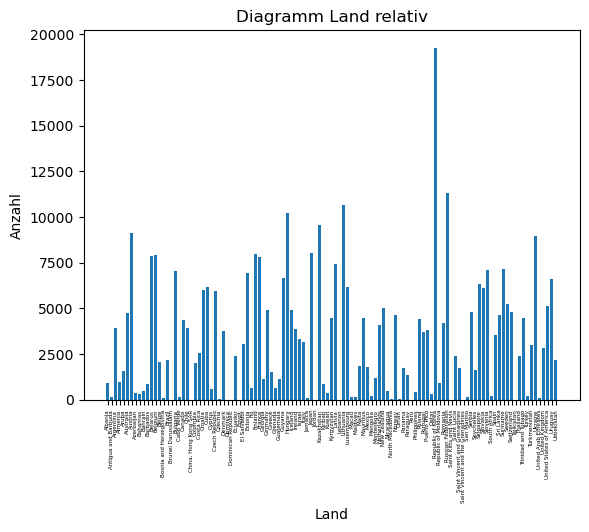

In [368]:
country2_no = dataclean.groupby('country')['suicides/100k pop'].sum().reset_index()
display(country2_no)
plt.bar(country2_no['country'], country2_no['suicides/100k pop'])
plt.title('Diagramm Land relativ')
plt.xticks(rotation='vertical', fontsize = 4)
plt.xlabel('Land')
plt.ylabel('Anzahl')
# Suicide pro 100k des Landes -> Suizide relativ und nicht total (aussagekräftiger)

,age,suicides_no
0,15-24 years,881090.0
1,25-34 years,1208715.0
2,35-54 years,2597691.0
3,5-14 years,59838.0
4,55-74 years,1780029.0
5,75+ years,718572.0


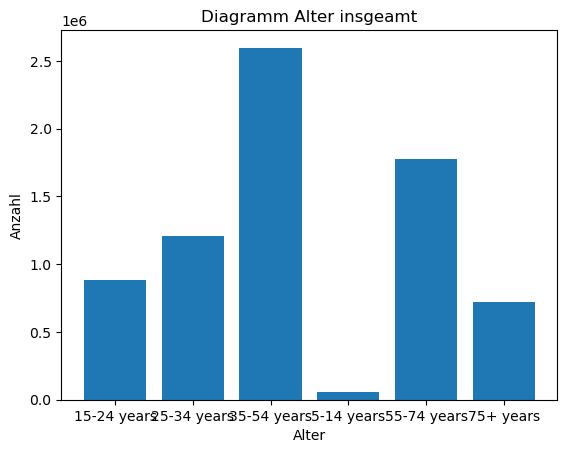

In [318]:
age_no = dataclean.groupby('age')['suicides_no'].sum().reset_index()
display(age_no)
plt.bar(age_no['age'], age_no['suicides_no'])
plt.title('Diagramm Alter insgeamt')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.show()
# Altersgruppen insgesamt 

,sex,suicides_no
0,female,1705078.0
1,male,5540857.0


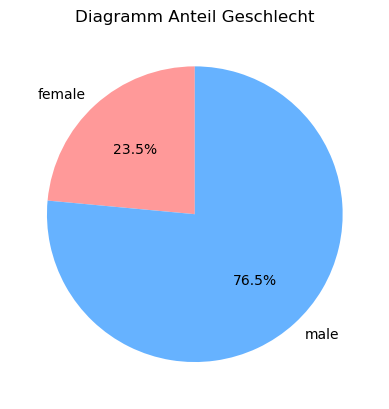

In [319]:
sex_no = dataclean.groupby('sex')['suicides_no'].sum().reset_index()
display(sex_no)
colors = ['#FF9999', '#66B2FF']
plt.pie(sex_no['suicides_no'], labels=['female', 'male'],autopct='%1.1f%%', startangle=90, colors = colors )
plt.title('Diagramm Anteil Geschlecht')
plt.show()
# Geschlecht insgesamt 

,year,suicides_no
0,1985,116063.0
1,1986,120670.0
2,1987,126842.0
3,1988,121026.0
4,1989,160244.0
5,1990,193361.0
6,1991,198020.0
7,1992,211473.0
8,1993,221565.0
9,1994,232063.0


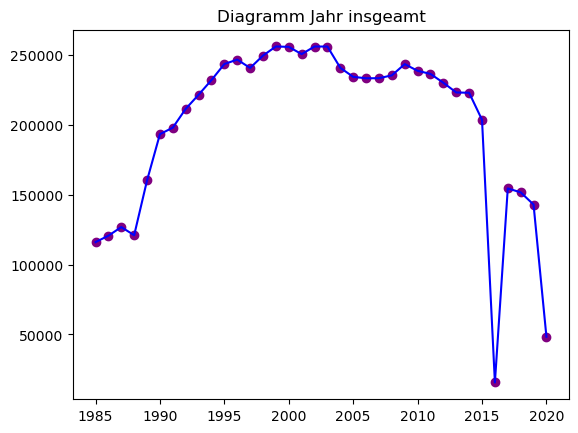

In [320]:
year_no = dataclean.groupby('year')['suicides_no'].sum().reset_index()
display(year_no)
plt.plot(year_no['year'], year_no['suicides_no'], color = 'blue')
plt.scatter(year_no['year'], year_no['suicides_no'],color = 'purple')
plt.title('Diagramm Jahr insgeamt')
plt.show()
# Jahr insgesamt  

,generation,suicides_no
0,Boomers,2369301.0
1,G.I. Generation,697049.0
2,Generation X,1612926.0
3,Generation Z,15906.0
4,Millenials,623459.0
5,Silent,1927294.0


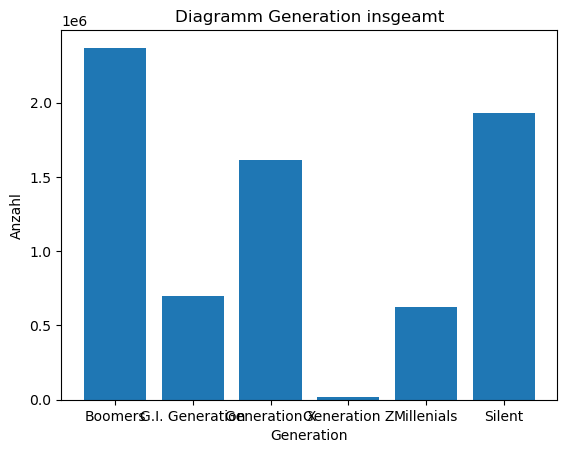

In [321]:
generation_no = dataclean.groupby('generation')['suicides_no'].sum().reset_index()
display(generation_no)
plt.bar(generation_no['generation'], generation_no['suicides_no'])
plt.title('Diagramm Generation insgeamt')
plt.xlabel('Generation')
plt.ylabel('Anzahl')
plt.show()
# Generationen insgeamt 

   gdp_for_year ($)  suicides_no
0        46919625.0         12.0
1        47515189.0         10.0
2        47737955.0          4.0
3        54832578.0         10.0
4        56338028.0          2.0
5        63101272.0          0.0
6        65334841.0          4.0
7        66515377.0          6.0
8        67254174.0          0.0
9        67537480.0          5.0


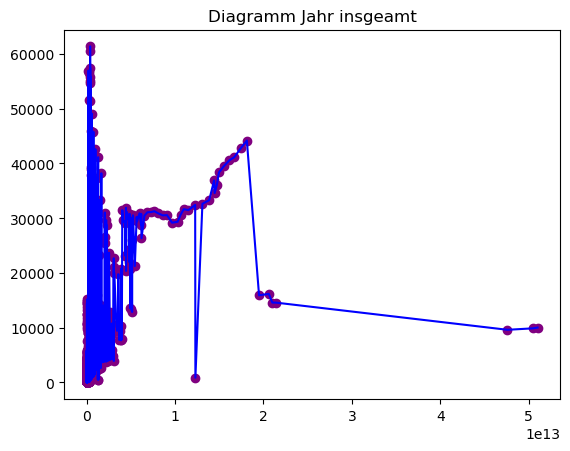

In [223]:
gdp_no = dataclean.groupby('gdp_for_year ($)')['suicides_no'].sum().reset_index()
print(gdp_no.head(10))
plt.plot(gdp_no['gdp_for_year ($)'], gdp_no['suicides_no'], color = 'blue')
plt.scatter(gdp_no['gdp_for_year ($)'], gdp_no['suicides_no'],color = 'purple')
plt.title('Diagramm Jahr insgeamt')
plt.show()
#GDP insgesamt 

,year,country,suicides_no
0,1985,Antigua and Barbuda,0.0
1,1985,Argentina,1988.0
2,1985,Australia,1861.0
3,1985,Austria,2091.0
4,1985,Bahamas,1.0
...,...,...,...
2544,2020,Serbia,895.0
2545,2020,Singapore,359.0
2546,2020,Slovenia,368.0
2547,2020,Spain,4369.0


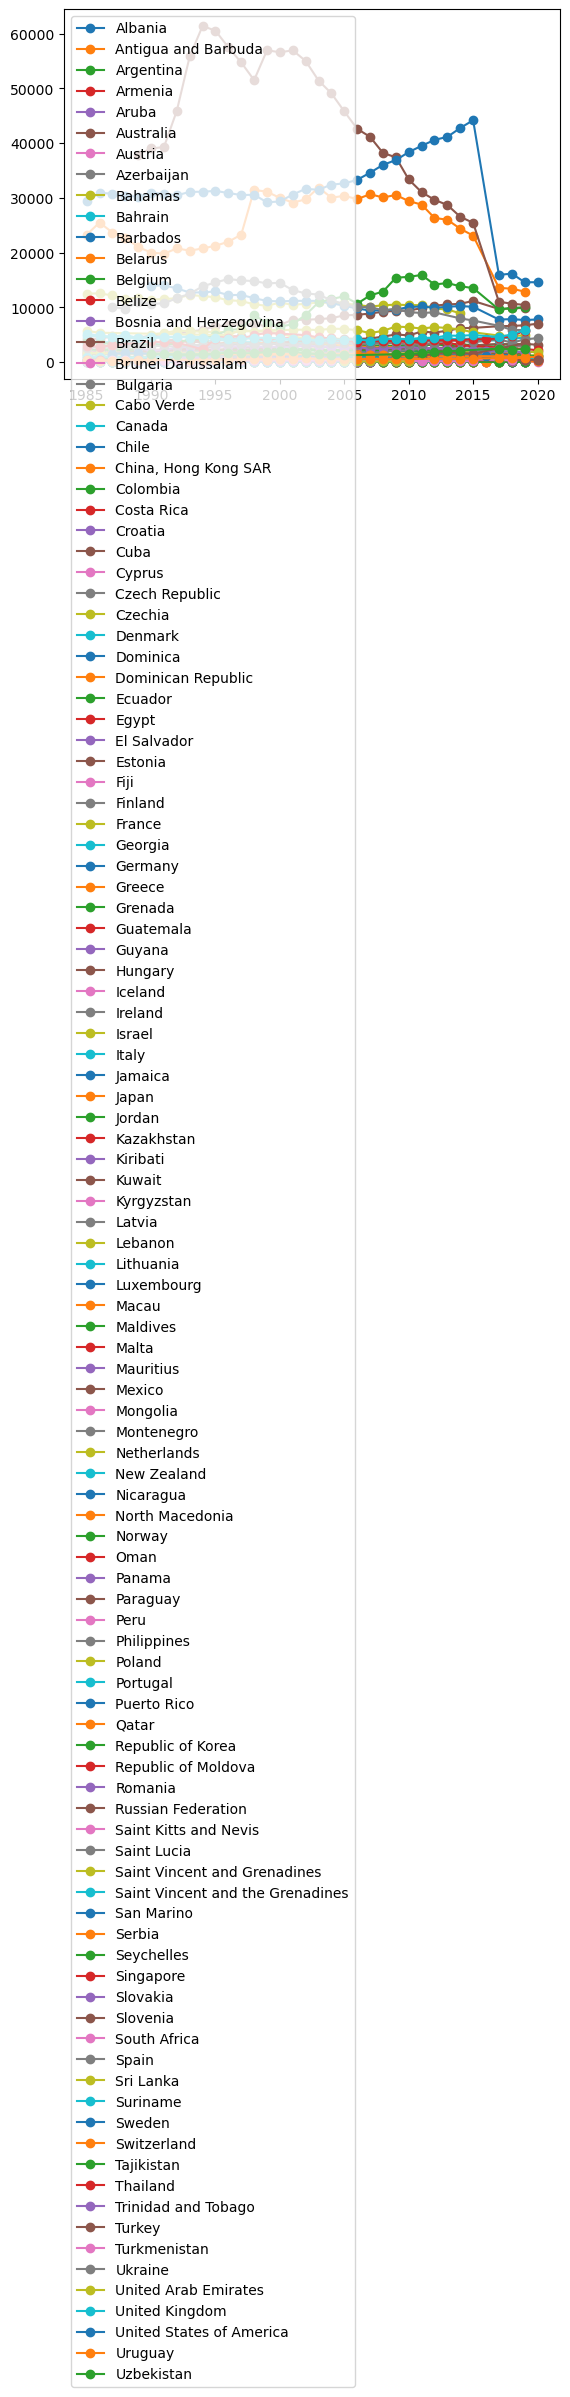

In [209]:
datahelp = dataclean.groupby(['year','country'])['suicides_no'].sum().reset_index()

display(datahelp)

for country, suicides in datahelp.groupby('country'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=country, marker='o')

plt.legend()
plt.show()
#jährliche Entwicklung der Länder absolut

,year,country,suicides/100k pop
0,1985,Antigua and Barbuda,0.000000
1,1985,Argentina,134.470000
2,1985,Australia,163.410000
3,1985,Austria,384.810000
4,1985,Bahamas,4.760000
...,...,...,...
2544,2020,Serbia,12.972658
2545,2020,Singapore,6.313967
2546,2020,Slovenia,17.503647
2547,2020,Spain,9.223983


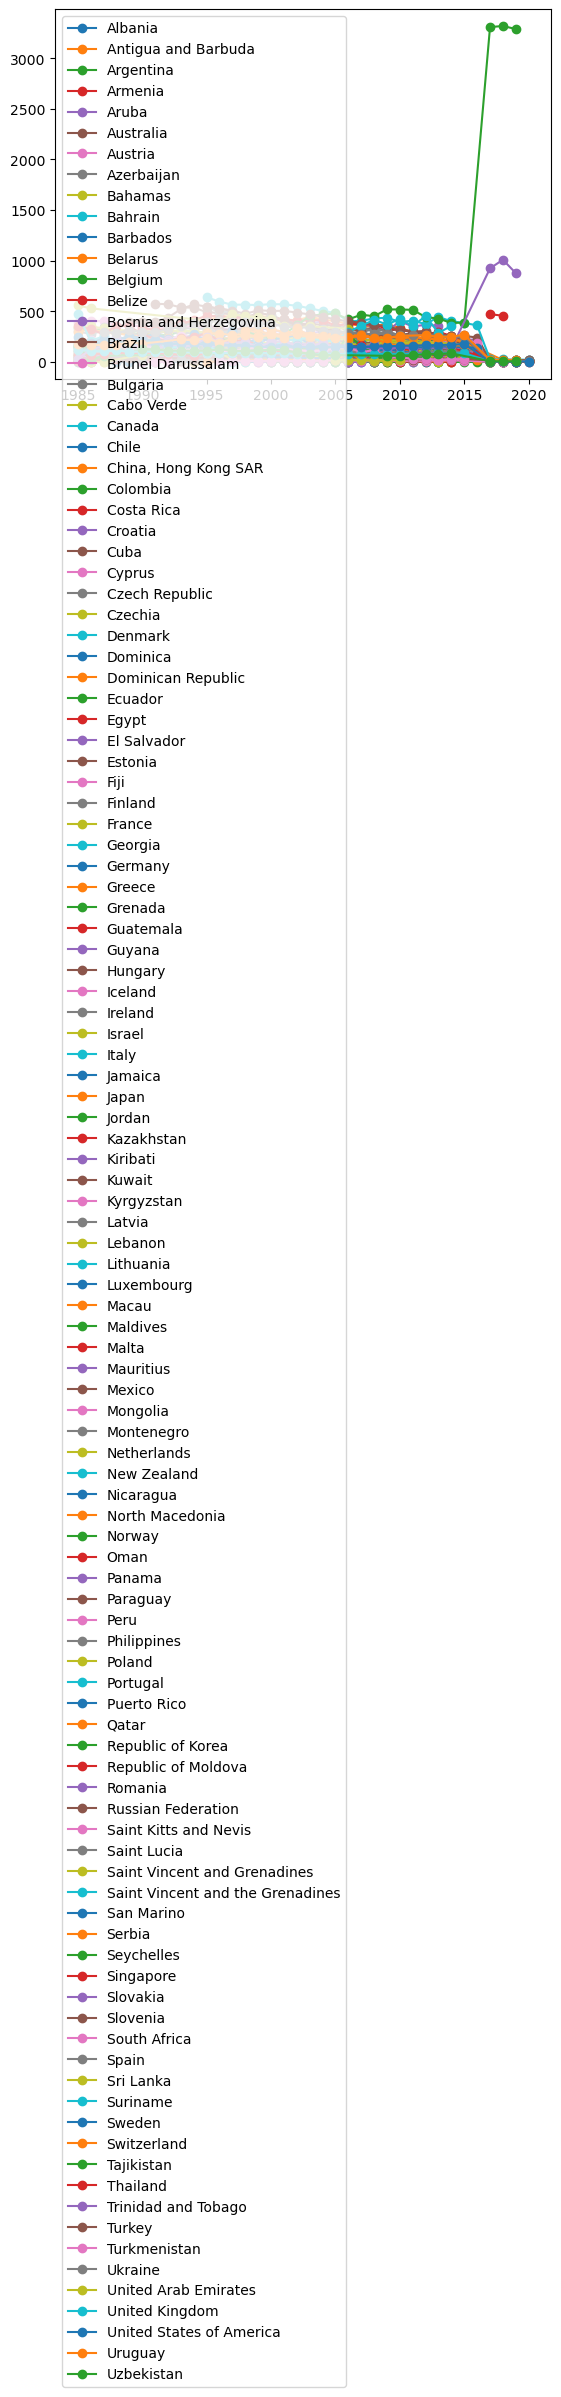

In [331]:
datahelp = dataclean.groupby(['year','country'])['suicides/100k pop'].sum().reset_index()

display(datahelp)

for country, suicides in datahelp.groupby('country'):
    plt.plot(suicides['year'], suicides['suicides/100k pop'], label=country, marker='o')

plt.legend()
plt.show()
#jährliche Entwicklung der Länder relativ 

,year,age,suicides_no
0,1985,15-24 years,17870.0
1,1985,25-34 years,20771.0
2,1985,35-54 years,35748.0
3,1985,5-14 years,984.0
4,1985,55-74 years,28736.0
...,...,...,...
210,2020,25-34 years,8183.0
211,2020,35-54 years,13567.0
212,2020,5-14 years,1125.0
213,2020,55-74 years,11231.0


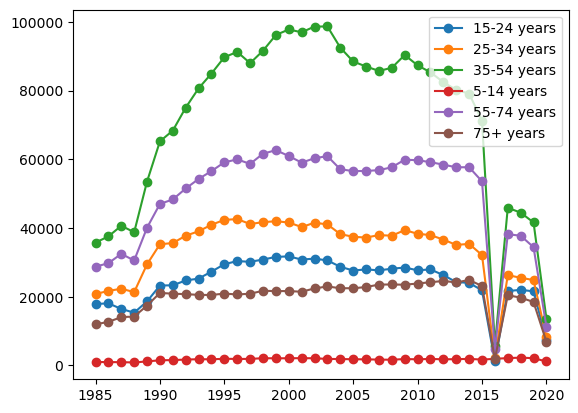

In [324]:
datahelp2 = dataclean.groupby(['year','age'])['suicides_no'].sum().reset_index()

display(datahelp2)

for age, suicides in data.groupby('age'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=age, marker='o')

plt.legend()
plt.show()
# jährliche Entwicklung Alter

In [212]:
yeargdp = dataclean.groupby(['gdp_for_year ($)','year']).suicides_no.sum()
display(yeargdp)
# jährliche Entwicklung GDP

gdp_for_year ($)  year
4.691962e+07      1993       12.0
4.751519e+07      1991       10.0
4.773796e+07      1992        4.0
5.483258e+07      1994       10.0
5.633803e+07      1995        2.0
                           ...   
2.100000e+13      2020    14577.0
2.140000e+13      2019    14569.0
4.760000e+13      2017     9600.0
5.050000e+13      2018     9867.0
5.100000e+13      2019    10010.0
Name: suicides_no, Length: 2548, dtype: float64

,year,sex,suicides_no
0,1985,female,32479.0
1,1985,male,83584.0
2,1986,female,33852.0
3,1986,male,86818.0
4,1987,female,35006.0
...,...,...,...
67,2018,male,106988.0
68,2019,female,40750.0
69,2019,male,102216.0
70,2020,female,14732.0


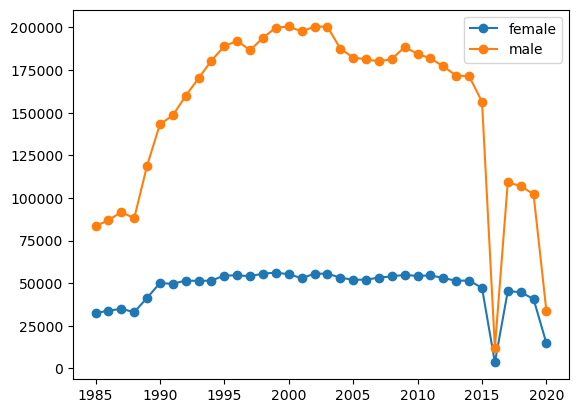

In [335]:
datahelp3 = dataclean.groupby(['year','sex'])['suicides_no'].sum().reset_index()

display(datahelp3)

for sex, suicides in datahelp.groupby('sex'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=sex, marker='o')

plt.legend()
plt.show()
#jährliche Entwicklung Geschlecht 

,year,generation,suicides_no
0,1985,Boomers,20771.0
1,1985,G.I. Generation,40690.0
2,1985,Generation X,18854.0
3,1985,Silent,35748.0
4,1986,Boomers,21685.0
...,...,...,...
157,2019,Silent,41615.0
158,2020,Boomers,8183.0
159,2020,G.I. Generation,18089.0
160,2020,Generation X,8490.0


<function matplotlib.pyplot.show(close=None, block=None)>

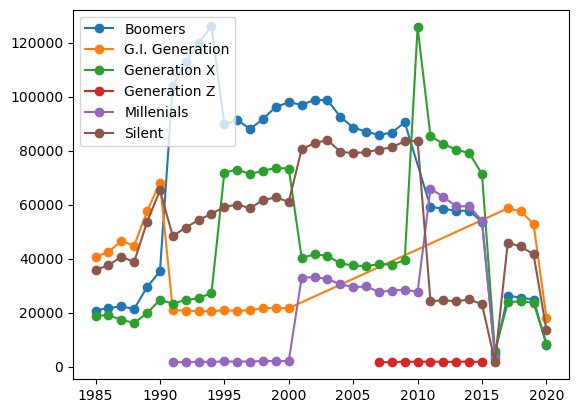

In [340]:
datahelp4 = dataclean.groupby(['year','generation'])['suicides_no'].sum().reset_index()

display(datahelp4)

for generation, suicides in datahelp.groupby('generation'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=generation, marker='o')

plt.legend()
plt.show
#jährliche Entwicklung Generation

In [341]:
hdi = pd.read_csv('HDR21-22_Statistical_Annex_HDI_Trends_Table.csv')
hdi = hdi.rename(columns = {'Country': 'country'})
# Einlesen der HDI Datei

In [342]:
merged_data = pd.merge(dataclean, hdi, on='country', how='inner')

def get_value(row):
    year = row['year']
    column = f'hdi_{year}'
               
    if column in merged_data.columns:
        return row[column]
    else:
        return None
               
merged_data['hdi'] = merged_data.apply(get_value, axis=1)
               
merged_data = merged_data[['year', 'country', 'sex', 'age', 'suicides_no', 'hdi']].dropna()
# inner Join von HDI und dataclean

In [343]:
display(merged_data)

,year,country,sex,age,suicides_no,hdi
132,2000,Albania,male,25-34 years,17.0,0.677
133,2000,Albania,male,55-74 years,10.0,0.677
134,2000,Albania,female,75+ years,2.0,0.677
135,2000,Albania,male,75+ years,1.0,0.677
136,2000,Albania,female,15-24 years,6.0,0.677
...,...,...,...,...,...,...
28376,2018,Peru,female,15-24 years,62.0,0.776
28378,2018,Peru,female,25-34 years,33.0,0.776
28380,2018,Peru,female,35-54 years,24.0,0.776
28382,2018,Peru,female,55-74 years,10.0,0.776


,year,hdi,suicides_no
0,1990,0.484,158.0
1,1990,0.509,89.0
2,1990,0.525,571.0
3,1990,0.576,3753.0
4,1990,0.593,3.0
...,...,...,...
350,2020,0.913,1440.0
351,2020,0.939,2183.0
352,2020,0.944,7766.0
353,2020,0.947,3139.0


<function matplotlib.pyplot.show(close=None, block=None)>

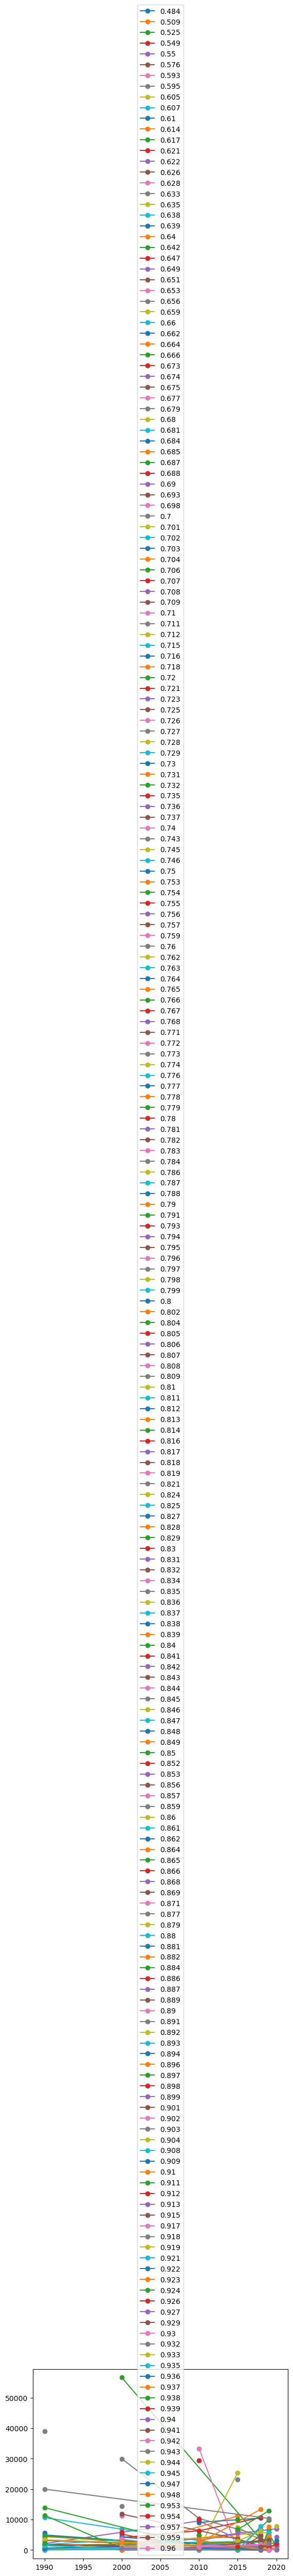

In [344]:
datahelp = merged_data.groupby(['year','hdi'])['suicides_no'].sum().reset_index()

display(datahelp)

for hdi, suicides in datahelp.groupby('hdi'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=hdi, marker='o')

plt.legend()
plt.show
# Suizide in Abhänigkeit vom HDI

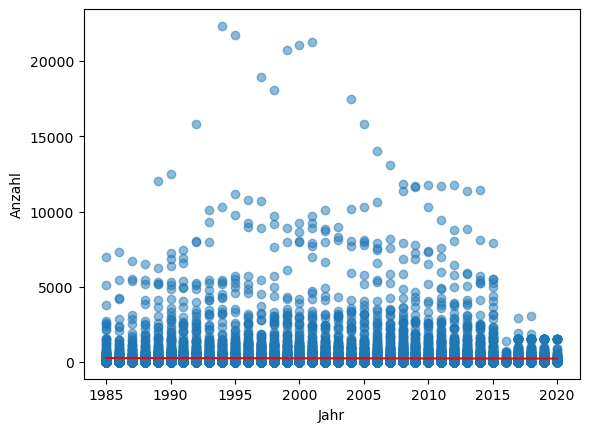

In [551]:
#Linerare Regression Jahr 
regressor = LinearRegression()
x_reg =  dataclean['year']
y_reg = dataclean['suicides_no']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')
plt.show()

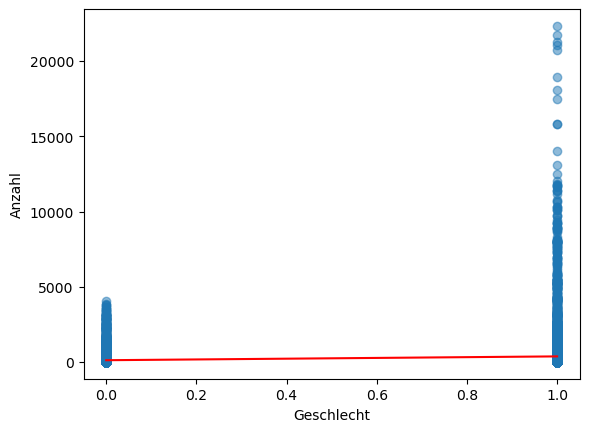

In [553]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataclean['sex_neu'] = label.fit_transform(dataclean['sex'])

#Linerare Regression Jahr 
regressor = LinearRegression()
x_reg =  dataclean['sex_neu']
y_reg = dataclean['suicides_no']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.show()



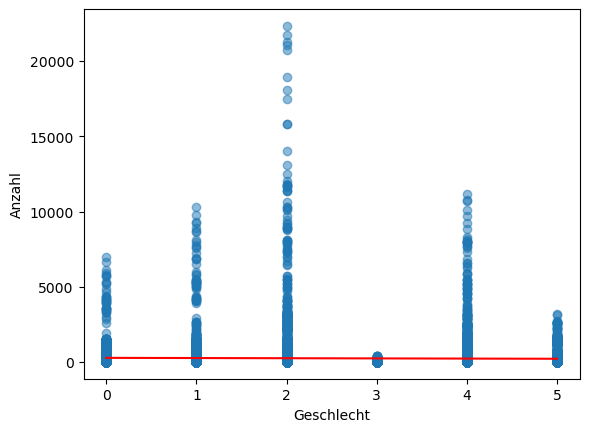

In [554]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataclean['age_neu'] = label.fit_transform(dataclean['age'])

regressor = LinearRegression()
x_reg =  dataclean['age_neu']
y_reg = dataclean['suicides_no']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.show()


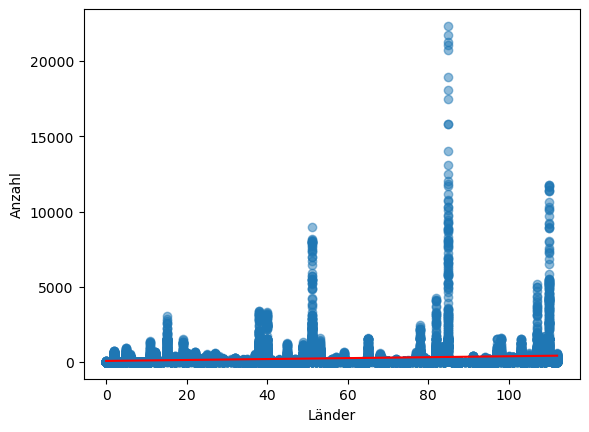

In [560]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataclean['country_neu'] = label.fit_transform(dataclean['country'])

regressor = LinearRegression()
x_reg =  dataclean['country_neu']
y_reg = dataclean['suicides_no']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Länder')
plt.ylabel('Anzahl')
plt.show()


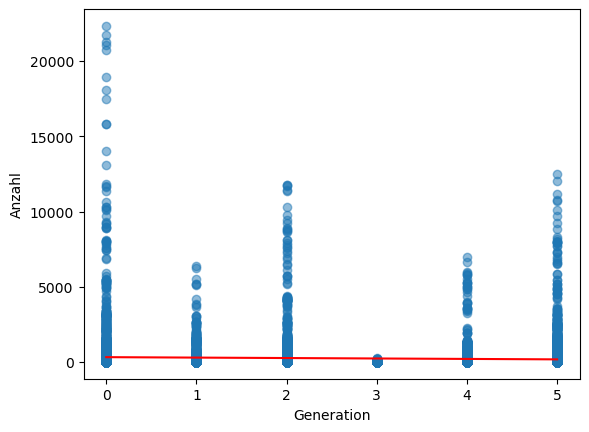

In [557]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataclean['generation_neu'] = label.fit_transform(dataclean['generation'])

regressor = LinearRegression()
x_reg =  dataclean['generation_neu']
y_reg = dataclean['suicides_no']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Generation')
plt.ylabel('Anzahl')
plt.show()


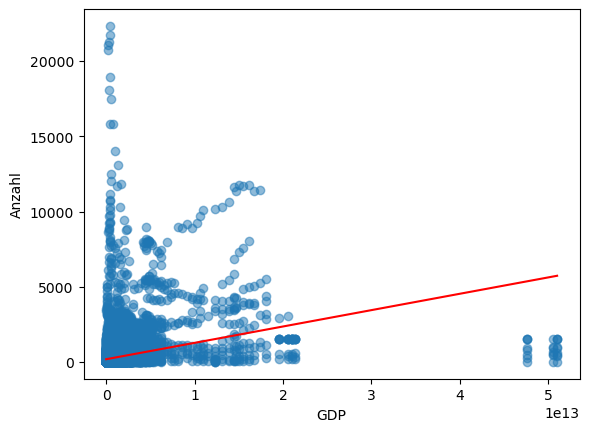

In [561]:
regressor = LinearRegression()
x_reg =  dataclean['gdp_for_year ($)']
y_reg = dataclean['suicides_no']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('GDP')
plt.ylabel('Anzahl')
plt.show()


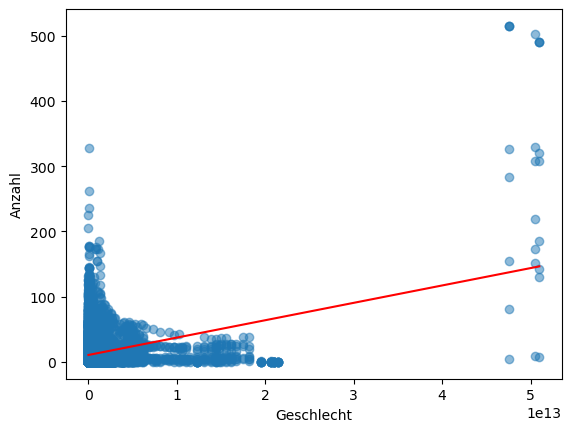

In [565]:
regressor = LinearRegression()
x_reg =  dataclean['gdp_for_year ($)']
y_reg = dataclean['suicides/100k pop']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('GDP')
plt.ylabel('Anzahl')
plt.show()


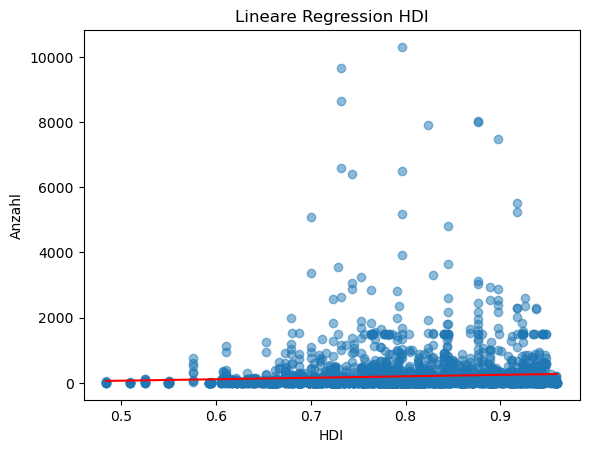

In [566]:
regressor = LinearRegression()
x_reg =  merged_data['hdi']
y_reg = merged_data['suicides_no']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')

plt.xlabel('HDI')
plt.ylabel('Anzahl')
plt.title('Lineare Regression HDI')
plt.show()

#Linerare Regression Jahr 

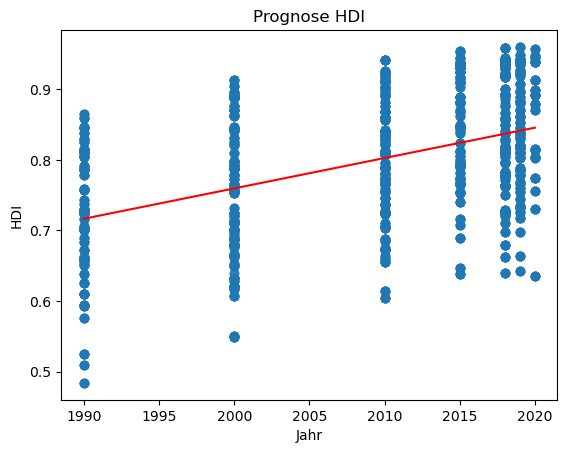

In [567]:
regressor = LinearRegression()
x_reg =  merged_data['year']
y_reg = merged_data['hdi']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('HDI')
plt.title('Prognose HDI')
plt.show()
#Prognose HDI 

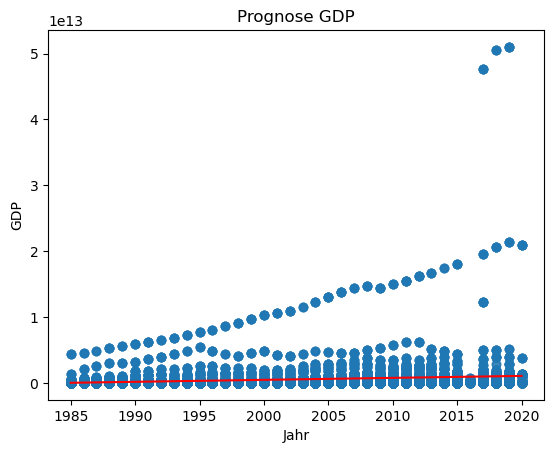

In [569]:
regressor = LinearRegression()
x_reg =  dataclean['year']
y_reg = dataclean['gdp_for_year ($)']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('GDP')
plt.title('Prognose GDP')
plt.show()
#Prognose GDP 

In [354]:
def custom_rename(value):
    if 0.4 <= value < 0.5:
        return 'Group_0.4'
    elif 0.5 <= value < 0.6:
        return 'Group_0.5'
    elif 0.6 <= value < 0.7:
        return 'Group_0.6'
    elif 0.7 <= value < 0.8:
        return 'Group_0.7'
    elif 0.8 <= value < 0.9:
        return 'Group_0.8'
    elif 0.9 <= value < 1.0:
        return 'Group_0.9'
    else:
        return 'Other_Value'


merged_data['HDI_neu'] = merged_data['hdi'].apply(custom_rename)


print(merged_data)

       year  country     sex          age  suicides_no    hdi    HDI_neu
132    2000  Albania    male  25-34 years         17.0  0.677  Group_0.6
133    2000  Albania    male  55-74 years         10.0  0.677  Group_0.6
134    2000  Albania  female    75+ years          2.0  0.677  Group_0.6
135    2000  Albania    male    75+ years          1.0  0.677  Group_0.6
136    2000  Albania  female  15-24 years          6.0  0.677  Group_0.6
...     ...      ...     ...          ...          ...    ...        ...
28376  2018     Peru  female  15-24 years         62.0  0.776  Group_0.7
28378  2018     Peru  female  25-34 years         33.0  0.776  Group_0.7
28380  2018     Peru  female  35-54 years         24.0  0.776  Group_0.7
28382  2018     Peru  female  55-74 years         10.0  0.776  Group_0.7
28384  2018     Peru  female    75+ years          2.0  0.776  Group_0.7

[4860 rows x 7 columns]


,year,HDI_neu,suicides_no
0,1990,Group_0.4,158.0
1,1990,Group_0.5,4515.0
2,1990,Group_0.6,13657.0
3,1990,Group_0.7,80967.0
4,1990,Group_0.8,53456.0
5,2000,Group_0.5,182.0
6,2000,Group_0.6,32968.0
7,2000,Group_0.7,101905.0
8,2000,Group_0.8,80911.0
9,2000,Group_0.9,1672.0


<function matplotlib.pyplot.show(close=None, block=None)>

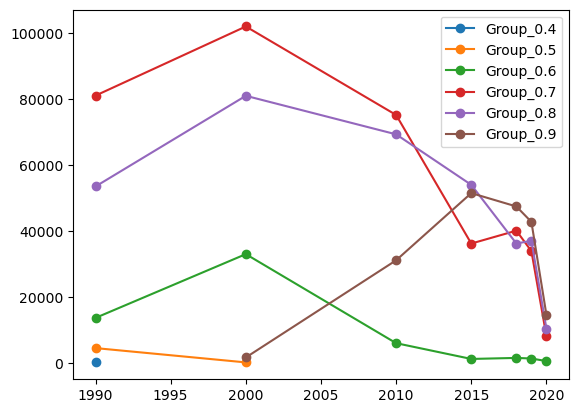

In [355]:
datahelp = merged_data.groupby(['year','HDI_neu'])['suicides_no'].sum().reset_index()

display(datahelp)

for hdi, suicides in datahelp.groupby('HDI_neu'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=hdi, marker='o')

plt.legend()
plt.show
# Suizide in Abhänigkeit vom HDI

In [356]:
def custom_rename(value):
    if 4.691962e+07 <= value < 5e+07:
        return 'Group_4e+07'
    elif 0.5e+07 <= value < 0.5e+08:
        return 'Group_5e+07'
    elif 0.5e+08 <= value < 0.5e+09:
        return 'Group_5e+08'
    elif 0.5e+09 <= value < 0.5e+10:
        return 'Group_5e+09'
    elif 0.5e+10 <= value < 0.5e+11:
        return 'Group_5e+10'
    elif 0.5e+11 <= value < 0.5e+12:
        return 'Group_5e+11'
    elif 0.5e+12 <= value < 5.100000e+13:
        return 'Group_5e+12'
    else:
        return 'Other_Value'


dataclean['GDP_neu'] = dataclean['gdp_for_year ($)'].apply(custom_rename)


print(dataclean)


                        country  year     sex          age  suicides_no  \
0                       Albania  1987    male  15-24 years         21.0   
1                       Albania  1987    male  35-54 years         16.0   
2                       Albania  1987  female  15-24 years         14.0   
3                       Albania  1987    male    75+ years          1.0   
4                       Albania  1987    male  25-34 years          9.0   
...                         ...   ...     ...          ...          ...   
31751                   Ukraine  2017  female    75+ years        256.0   
31752            United Kingdom  2017  female    75+ years        104.0   
31753  United States of America  2017  female    75+ years        501.0   
31754                   Uruguay  2017  female    75+ years         14.0   
31755                Uzbekistan  2017  female    75+ years          3.0   

       population  suicides/100k pop  gdp_for_year ($)       generation  \
0          312900       

,year,GDP_neu,suicides_no
0,1985,Group_5e+08,11.0
1,1985,Group_5e+09,778.0
2,1985,Group_5e+10,15114.0
3,1985,Group_5e+11,34956.0
4,1985,Group_5e+12,65204.0
...,...,...,...
161,2019,Group_5e+12,95671.0
162,2019,Other_Value,10010.0
163,2020,Group_5e+10,997.0
164,2020,Group_5e+11,8666.0


<function matplotlib.pyplot.show(close=None, block=None)>

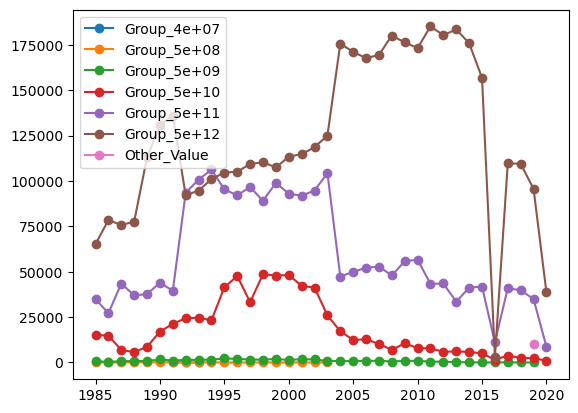

In [357]:
datahelp = dataclean.groupby(['year','GDP_neu'])['suicides_no'].sum().reset_index()

display(datahelp)

for hdi, suicides in datahelp.groupby('GDP_neu'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=hdi, marker='o')

plt.legend()
plt.show
# GDP insgesamt (gruppiert)

,year,GDP_neu,suicides/100k pop
0,1985,Group_5e+08,214.050000
1,1985,Group_5e+09,1424.300000
2,1985,Group_5e+10,2389.590000
3,1985,Group_5e+11,1949.860000
4,1985,Group_5e+12,834.090000
...,...,...,...
161,2019,Group_5e+12,118.872282
162,2019,Other_Value,3288.393057
163,2020,Group_5e+10,65.459074
164,2020,Group_5e+11,109.784548


<function matplotlib.pyplot.show(close=None, block=None)>

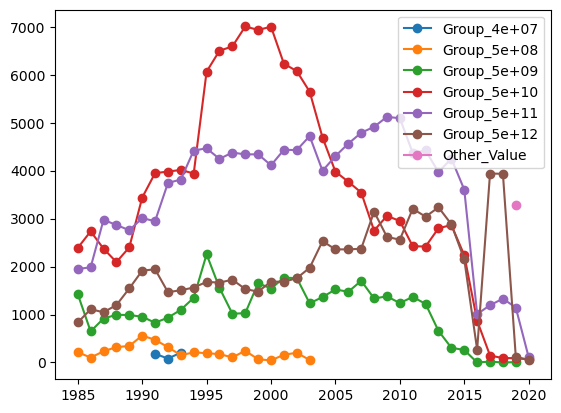

In [286]:
datahelp = dataclean.groupby(['year','GDP_neu'])['suicides/100k pop'].sum().reset_index()

display(datahelp)

for hdi, suicides in datahelp.groupby('GDP_neu'):
    plt.plot(suicides['year'], suicides['suicides/100k pop'], label=hdi, marker='o')

plt.legend()
plt.show
# GDP realiv (gruppiert)

       GDP_neu  suicides/100k pop
0  Group_4e+07         467.540000
1  Group_5e+08        4175.350000
2  Group_5e+09       37808.321413
3  Group_5e+10      128122.662850
4  Group_5e+11      128131.753859
5  Group_5e+12       70080.475514
6  Other_Value        3288.393057


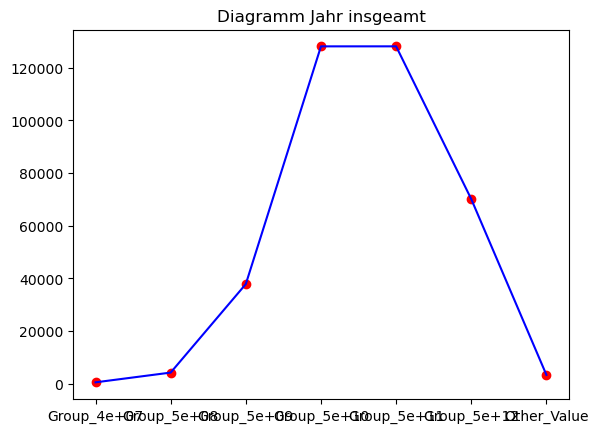

In [585]:
gdp_no = dataclean.groupby('GDP_neu')['suicides/100k pop'].sum().reset_index()
print(gdp_no.head(10))
plt.plot(gdp_no['GDP_neu'], gdp_no['suicides/100k pop'], color = 'blue')
plt.scatter(gdp_no['GDP_neu'], gdp_no['suicides/100k pop'],color = 'red')
plt.title('Diagramm Jahr insgeamt')
plt.show()
#GDP relativ (gruppiert)

       GDP_neu  suicides_no
0  Group_4e+07         26.0
1  Group_5e+08        800.0
2  Group_5e+09      32585.0
3  Group_5e+10     657734.0
4  Group_5e+11    2121130.0
5  Group_5e+12    4423650.0
6  Other_Value      10010.0


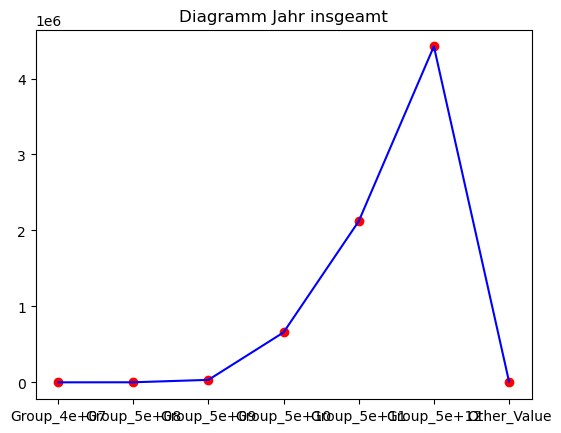

In [584]:
gdp_no = dataclean.groupby('GDP_neu')['suicides_no'].sum().reset_index()
print(gdp_no.head(10))
plt.plot(gdp_no['GDP_neu'], gdp_no['suicides_no'], color = 'blue')
plt.scatter(gdp_no['GDP_neu'], gdp_no['suicides_no'],color = 'red')
plt.title('Diagramm Jahr insgeamt')
plt.show()
#GDP insgesamt (gruppiert)


In [432]:
word = 'female'

suicide_female = dataclean[dataclean['sex'] == word]['suicides_no'].tolist()
year_female = dataclean[dataclean['sex'] == word]['year'].tolist()
#matrix = np.column_stack((female,f))
female = pd.DataFrame({'suicide': suicide_female, 'year': year_female})
print(female)

       suicide  year
0         14.0  1987
1          1.0  1987
2          6.0  1987
3          4.0  1987
4          0.0  1987
...        ...   ...
15273    256.0  2017
15274    104.0  2017
15275    501.0  2017
15276     14.0  2017
15277      3.0  2017

[15278 rows x 2 columns]


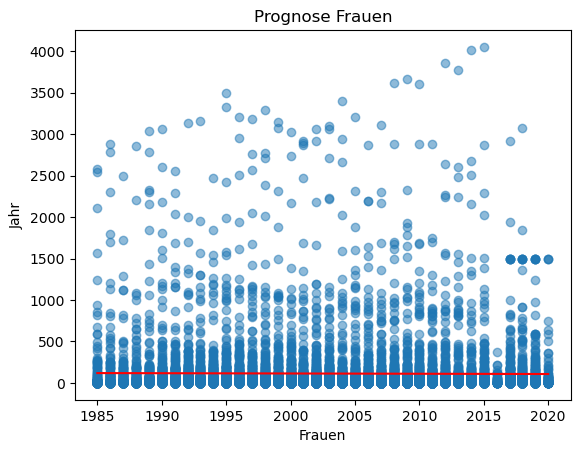

In [570]:
regressor = LinearRegression()
x_reg =  female['year']
y_reg = female['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Frauen')
plt.ylabel('Jahr')
plt.title('Prognose Frauen')
plt.show()
#Prognose HDI 

In [434]:
word = 'male'

suicide_male = dataclean[dataclean['sex'] == word]['suicides_no'].tolist()
year_male = dataclean[dataclean['sex'] == word]['year'].tolist()
male = pd.DataFrame({'suicide': suicide_male, 'year': year_male})
print(male)

       suicide  year
0         21.0  1987
1         16.0  1987
2          1.0  1987
3          9.0  1987
4          1.0  1987
...        ...   ...
15273    552.0  2017
15274    234.0  2017
15275   1495.0  2017
15276     71.0  2017
15277     18.0  2017

[15278 rows x 2 columns]


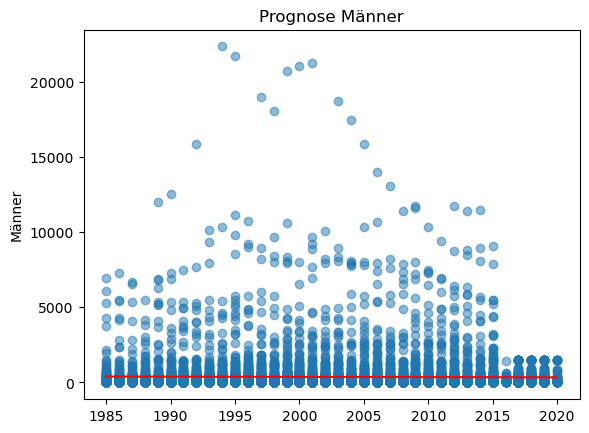

In [571]:
regressor = LinearRegression()
x_reg =  male['year']
y_reg = male['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.ylabel('Männer')
plt.title('Prognose Männer')
plt.show()
#Prognose HDI 

In [498]:
word = '5-14 years'

suicide_5 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_5 = dataclean[dataclean['age'] == word]['year'].tolist()
five = pd.DataFrame({'suicide': suicide_5, 'year': year_5})
print(five)

      suicide  year
0         0.0  1987
1         0.0  1987
2         0.0  1988
3         0.0  1988
4         0.0  1989
...       ...   ...
5061     10.0  2017
5062      8.0  2017
5063    170.0  2017
5064      1.0  2017
5065     36.0  2017

[5066 rows x 2 columns]


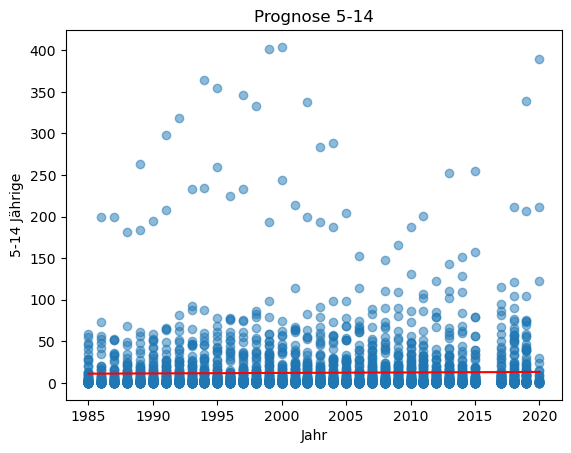

In [573]:
regressor = LinearRegression()
x_reg =  five['year']
y_reg = five['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('5-14 Jährige')
plt.title('Prognose 5-14')
plt.show()
#Prognose 5-14 Jahre 

In [535]:
word = '15-24 years'

suicide_15 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_15 = dataclean[dataclean['age'] == word]['year'].tolist()
fiveteen = pd.DataFrame({'suicide': suicide_15, 'year': year_15})
print(fiveteen)

      suicide  year
0        21.0  1987
1        14.0  1987
2        17.0  1988
3         8.0  1988
4        12.0  1989
...       ...   ...
5093     78.0  2017
5094    120.0  2017
5095   1495.0  2017
5096     22.0  2017
5097    417.0  2017

[5098 rows x 2 columns]


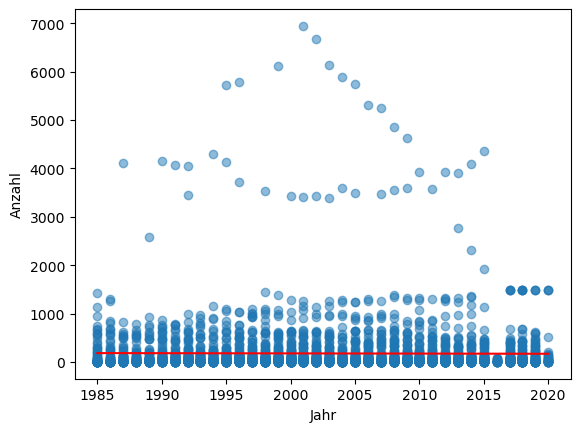

In [547]:
regressor = LinearRegression()
x_reg =  fiveteen['year']
y_reg = fiveteen['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')
plt.show()

In [502]:
word = '25-34 years'

suicide_25 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_25 = dataclean[dataclean['age'] == word]['year'].tolist()
twentyfive = pd.DataFrame({'suicide': suicide_25, 'year': year_25})
print(twentyfive)

      suicide  year
0         9.0  1987
1         4.0  1987
2         5.0  1988
3         5.0  1988
4        18.0  1989
...       ...   ...
5093    159.0  2017
5094    162.0  2017
5095   1495.0  2017
5096     21.0  2017
5097    193.0  2017

[5098 rows x 2 columns]


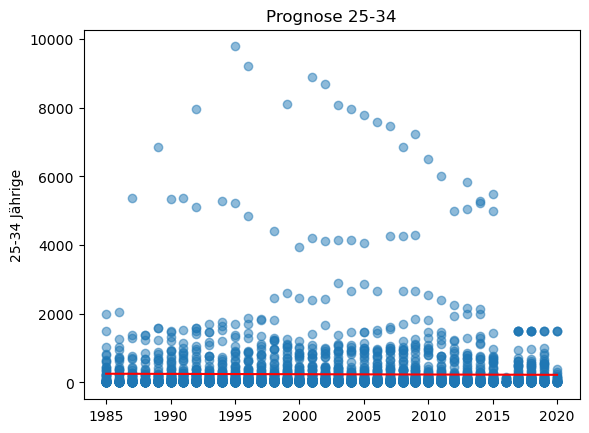

In [574]:
regressor = LinearRegression()
x_reg =  twentyfive['year']
y_reg = twentyfive['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.ylabel('25-34 Jährige')
plt.title('Prognose 25-34')
plt.show()
#Prognose 25-34 Jahre 

In [504]:
word = '35-54 years'

suicide_35 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_35 = dataclean[dataclean['age'] == word]['year'].tolist()
thirtyfive = pd.DataFrame({'suicide': suicide_35, 'year': year_35})
print(thirtyfive)

      suicide  year
0        16.0  1987
1         6.0  1987
2        14.0  1988
3         4.0  1988
4        15.0  1989
...       ...   ...
5093    309.0  2017
5094    421.0  2017
5095   1495.0  2017
5096     44.0  2017
5097    119.0  2017

[5098 rows x 2 columns]


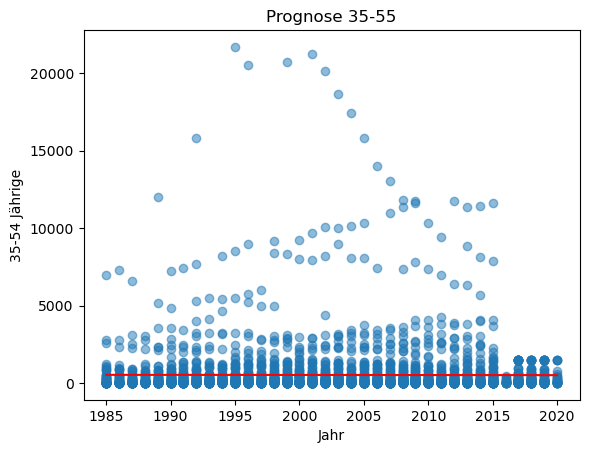

In [575]:
regressor = LinearRegression()
x_reg =  thirtyfive['year']
y_reg = thirtyfive['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('35-54 Jährige')
plt.title('Prognose 35-55')
plt.show()
#Prognose 35-54 Jahre 

In [506]:
word = '55-74 years'

suicide_55 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_55 = dataclean[dataclean['age'] == word]['year'].tolist()
fiftyfive = pd.DataFrame({'suicide': suicide_55, 'year': year_55})
print(fiftyfive)

      suicide  year
0         1.0  1987
1         0.0  1987
2         4.0  1988
3         3.0  1988
4         6.0  1989
...       ...   ...
5093    348.0  2017
5094    267.0  2017
5095   2924.0  2017
5096     32.0  2017
5097     33.0  2017

[5098 rows x 2 columns]


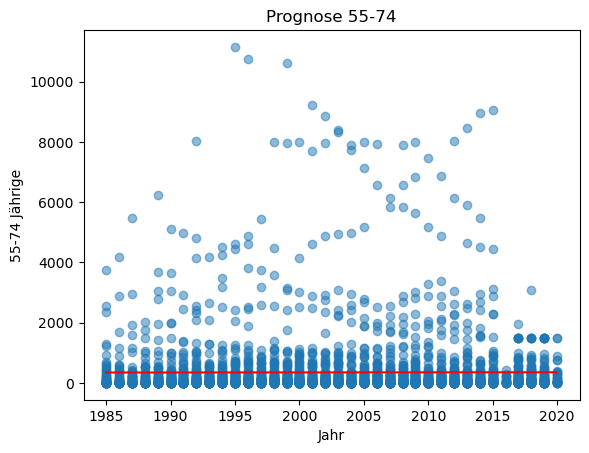

In [576]:
regressor = LinearRegression()
x_reg =  fiftyfive['year']
y_reg = fiftyfive['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('55-74 Jährige')
plt.title('Prognose 55-74')
plt.show()
#Prognose 55-74 Jahre 

In [508]:
word = '75+ years'

suicide_75 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_75 = dataclean[dataclean['age'] == word]['year'].tolist()
seventyfive = pd.DataFrame({'suicide': suicide_75, 'year': year_75})
print(fiftyfive)

      suicide  year
0         1.0  1987
1         0.0  1987
2         4.0  1988
3         3.0  1988
4         6.0  1989
...       ...   ...
5093    348.0  2017
5094    267.0  2017
5095   2924.0  2017
5096     32.0  2017
5097     33.0  2017

[5098 rows x 2 columns]


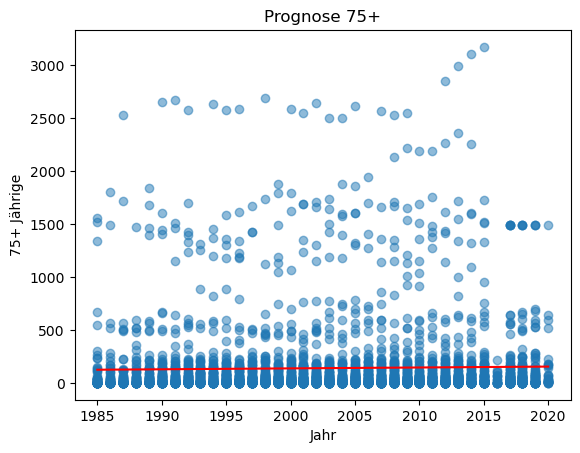

In [577]:
regressor = LinearRegression()
x_reg =  seventyfive['year']
y_reg = seventyfive['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('75+ Jährige')
plt.title('Prognose 75+')
plt.show()
#Prognose 75+ Jahre 

In [511]:
word = 'Generation X'

suicide_X = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_X = dataclean[dataclean['generation'] == word]['year'].tolist()
genX = pd.DataFrame({'suicide': suicide_X, 'year': year_X})
print(genX)

      suicide  year
0        21.0  1987
1        14.0  1987
2         0.0  1987
3         0.0  1987
4        17.0  1988
...       ...   ...
7315     78.0  2017
7316    120.0  2017
7317   1495.0  2017
7318     22.0  2017
7319    417.0  2017

[7320 rows x 2 columns]


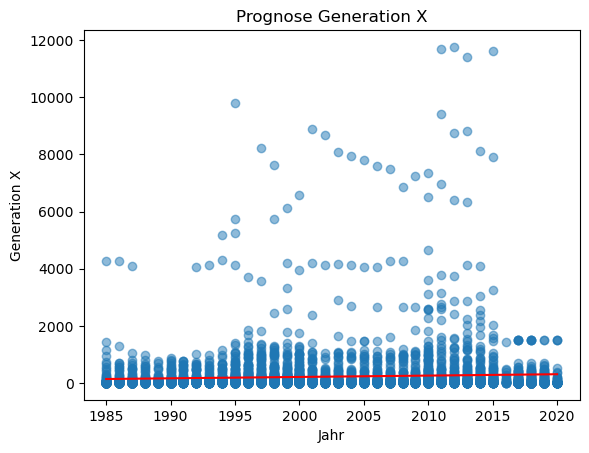

In [578]:
regressor = LinearRegression()
x_reg =  genX['year']
y_reg = genX['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('Generation X')
plt.title('Prognose Generation X')
plt.show()
#Prognose Gneration X Jahre 

In [513]:
word = 'Millenials'

suicide_mil = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_mil = dataclean[dataclean['generation'] == word]['year'].tolist()
gen_mil = pd.DataFrame({'suicide': suicide_mil, 'year': year_mil})
print(gen_mil)

      suicide  year
0         0.0  1992
1         0.0  1992
2         1.0  1993
3         1.0  1993
4         1.0  1994
...       ...   ...
5839    146.0  2013
5840    318.0  2014
5841    347.0  2014
5842    347.0  2014
5843    162.0  2014

[5844 rows x 2 columns]


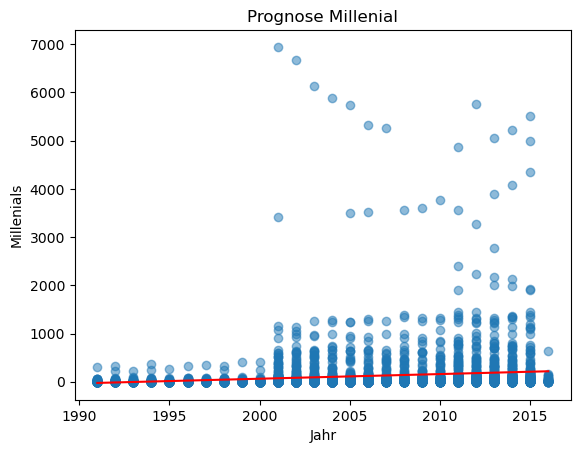

In [579]:
regressor = LinearRegression()
x_reg =  gen_mil['year']
y_reg = gen_mil['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('Millenials')
plt.title('Prognose Millenial')
plt.show()
#Prognose Millenials Jahre 

In [515]:
word = 'Generation Z'

suicide_Z = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_Z = dataclean[dataclean['generation'] == word]['year'].tolist()
genZ = pd.DataFrame({'suicide': suicide_Z, 'year': year_Z})
print(genZ)

      suicide  year
0         4.0  2007
1         0.0  2007
2         7.0  2008
3         1.0  2008
4         0.0  2009
...       ...   ...
1465     16.0  2012
1466     61.0  2013
1467     31.0  2013
1468     60.0  2014
1469     44.0  2014

[1470 rows x 2 columns]


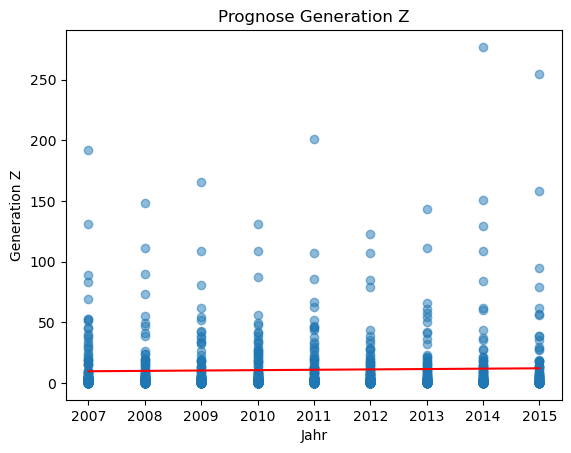

In [580]:
regressor = LinearRegression()
x_reg =  genZ['year']
y_reg = genZ['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('Generation Z')
plt.title('Prognose Generation Z')
plt.show()
#Prognose Gneration Z Jahre 

In [517]:
word = 'G.I. Generation'

suicide_gi = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_gi = dataclean[dataclean['generation'] == word]['year'].tolist()
gen_gi = pd.DataFrame({'suicide': suicide_gi, 'year': year_gi})
print(gen_gi)

      suicide  year
0         1.0  1987
1         1.0  1987
2         1.0  1987
3         0.0  1987
4         2.0  1988
...       ...   ...
3651    256.0  2017
3652    104.0  2017
3653    501.0  2017
3654     14.0  2017
3655      3.0  2017

[3656 rows x 2 columns]


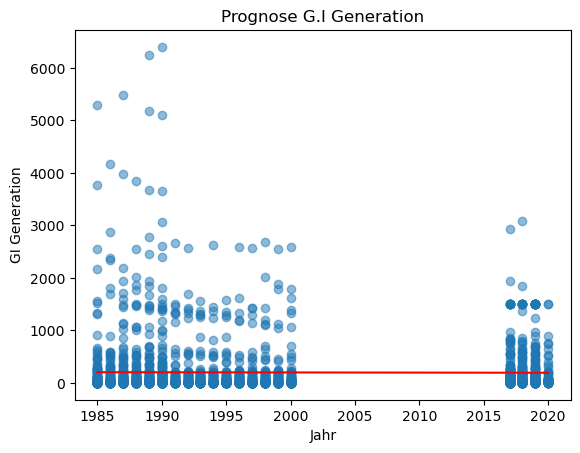

In [581]:
regressor = LinearRegression()
x_reg =  gen_gi['year']
y_reg = gen_gi['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('GI Generation')
plt.title('Prognose G.I Generation')
plt.show()
#Prognose G.I Generation Jahre

In [519]:
word = 'Boomers'

suicide_bo = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_bo = dataclean[dataclean['generation'] == word]['year'].tolist()
gen_bo = pd.DataFrame({'suicide': suicide_gi, 'year': year_gi})
print(gen_bo)

      suicide  year
0         1.0  1987
1         1.0  1987
2         1.0  1987
3         0.0  1987
4         2.0  1988
...       ...   ...
3651    256.0  2017
3652    104.0  2017
3653    501.0  2017
3654     14.0  2017
3655      3.0  2017

[3656 rows x 2 columns]


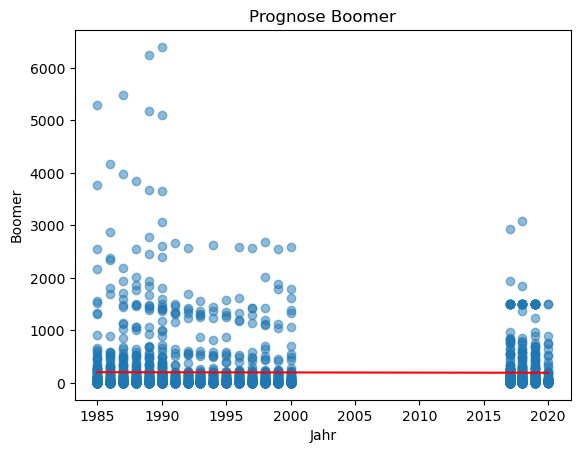

In [582]:
regressor = LinearRegression()
x_reg =  gen_bo['year']
y_reg = gen_bo['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('Boomer')
plt.title('Prognose Boomer')
plt.show()
#Prognose Boomer Jahre

In [521]:
word = 'Silent'

suicide_si = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_si = dataclean[dataclean['generation'] == word]['year'].tolist()
gen_si = pd.DataFrame({'suicide': suicide_si, 'year': year_si})
print(gen_si)

      suicide  year
0        16.0  1987
1         6.0  1987
2        14.0  1988
3         4.0  1988
4        15.0  1989
...       ...   ...
6815    309.0  2017
6816    421.0  2017
6817   1495.0  2017
6818     44.0  2017
6819    119.0  2017

[6820 rows x 2 columns]


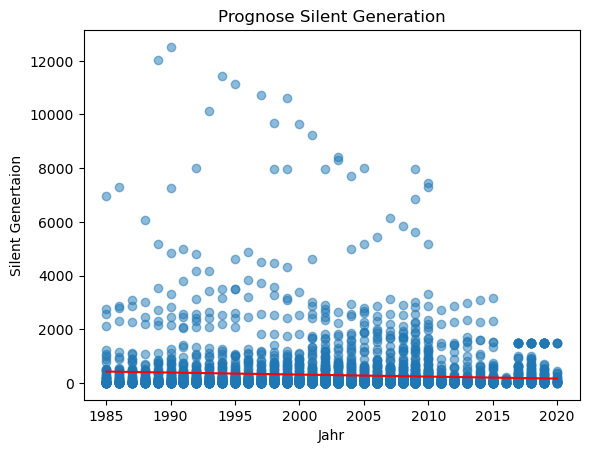

In [583]:
regressor = LinearRegression()
x_reg =  gen_si['year']
y_reg = gen_si['suicide']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.3, random_state= 1)
regressor.fit(np.array(x_reg_train).reshape(-1, 1), np.array(y_reg_train).reshape(-1, 1))
x_input = np.linspace(min(x_reg_train), max(x_reg_train), 500)
y_input = regressor.coef_ * x_input + regressor.intercept_
y_input = y_input.reshape(-1, 1)

plt.scatter(x = x_reg_train, y = y_reg_train, alpha = 0.5)
plt.plot(x_input, y_input, c = 'r')
plt.xlabel('Jahr')
plt.ylabel('Silent Genertaion')
plt.title('Prognose Silent Generation')
plt.show()
#Prognose Silent Generation Jahre